# Case Study: SMS Spam Classification Using Naive Bayes

In this case study, we will perform text classification to classify SMS messages as spam or ham (non-spam). We will use the **Naive Bayes classifier** for this task and walk through the process of data preprocessing, vectorization, training, and evaluation.

In [ ]:
!pip install nltk scikit-learn pandas numpy matplotlib seaborn

## 1. Importing Necessary Libraries
We will begin by importing the necessary libraries that will help us process the data, build the model, and evaluate it.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import zipfile
import io
import requests

In [ ]:
# Download necessary NLTK resources
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')
nltk.download('all')

## 2. Downloading and Loading the Dataset
In this step, we will download the dataset from the UCI Machine Learning Repository and load it into a pandas DataFrame for further processing.

In [16]:
# Downloading the ZIP file containing the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip"
response = requests.get(url)

# Extracting the dataset
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    print("Files in ZIP:", z.namelist())  # Listing the files in the ZIP
    with z.open('SMSSpamCollection') as file:
        data = pd.read_csv(file, sep='\t', header=None, names=["label", "text"])

# Display dataset preview
#print("Dataset Preview:\n", data.head())
data.head()
#data.shape

Files in ZIP: ['SMSSpamCollection', 'readme']


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 3. Preprocessing the Text Data
We will preprocess the text data by tokenizing the text, removing stopwords, and lemmatizing the words to prepare it for classification.

In [17]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Convert to lowercase and tokenize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]  # Lemmatization
    return " ".join(tokens)

# Apply the preprocessing function
data['clean_text'] = data['text'].apply(preprocess_text)

## 4. Vectorizing the Text Data
We will convert the text data into numerical vectors using the **TF-IDF (Term Frequency-Inverse Document Frequency)** method, which helps in representing the importance of words in the text.

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['clean_text'])
y = data['label']

## 5. Splitting the Data into Training and Testing Sets
We will split the data into training and testing sets (70% training and 30% testing) to evaluate the model's performance.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 6. Training the Naive Bayes Classifier
In this step, we will train the **Naive Bayes** classifier using the training data and evaluate its performance.

In [ ]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predicting the labels for the test data
y_pred_nb = nb_model.predict(X_test)

## 7. Model Evaluation
After training the model, we will evaluate its performance using **accuracy**, **classification report** (which includes precision, recall, and F1-score), and a **confusion matrix**.

In [ ]:
print("📌 Naive Bayes Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

📌 Naive Bayes Classifier Performance:
Accuracy: 0.9665071770334929
Classification Report:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1448
        spam       0.99      0.75      0.86       224

    accuracy                           0.97      1672
   macro avg       0.98      0.88      0.92      1672
weighted avg       0.97      0.97      0.96      1672



### 7.1. Confusion Matrix
Now, let's visualize the confusion matrix to see how well the classifier is distinguishing between spam and ham messages.

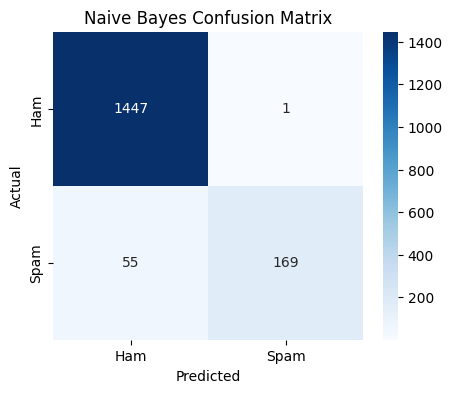

In [ ]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_pred_nb, "Naive Bayes Confusion Matrix")